<a href="https://colab.research.google.com/github/ruiqi-rachel-wang/MachineLearning-class/blob/main/FML_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentals of Machine Learning (CSCI-UA.473)

## Homework 2
### Due: October 26th, 2023 at 11:59PM

### Name: Ruiqi Wang
### Email: rw2799@nyu.edu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

## Use the same dataset that was released with HW1
data = pd.read_csv('/content/FML2023_HW1_Dataset.csv')
# Separate the features, target values, and feature names
X = data.drop('target', axis=1)
y = data['target'].values
X =X.to_numpy()


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Question 1: Maximum Likelihood Estimation (MLE) vs Maximum A Posteriori (MAP) (25 points)

In Homework 1, we performed linear and ridge regression. To summarize:

In Linear regression,

$$\beta = \arg\min_{\beta}\sum\left(y_i - \left(\beta_0 + \beta_1 x_{1i} +, \ldots, + \beta_px_{p i}\right)\right)^2$$


* $J(\beta)$ is the cost function.
* $\beta_0,\ldots,\beta_p$ are the coefficients for the features.
* $x_{1i}$ represents the values of the feature for the i-th observation.
* $y_i$ is the target value for the i-th observation.

For ridge regression

$$J(\beta) = \sum\left(y_i - \left(\beta_0 + \beta_1 x_{1i} +, \ldots, + \beta_px_{p i}\right)\right)^2 + \lambda \cdot \sum \beta_i^2$$

* $\lambda$ is the regularization hyper-parameter.

**Task 1.1 (5 points)** Linear regression embodies Maximum Likelihood Estimation (MLE). Show that a closed form expression is $$\beta = (\mathbf{A}^\top \mathbf{A})^{-1}\mathbf{A}^\top \mathbf{Y}$$ where $\mathbf{A} = [X_1,\ldots,X_n]$ and $\mathbf{Y} = [Y_1,\ldots,Y_n]$.

**Task 1.2 (5 points)**: Ridge regression embodies Maximum A Posteriori (MAP), wherein the regularizer serves as the prior. Show that a closed form expression for the ridge estimator is $$\beta = (\mathbf{A}^\top \mathbf{A} + \lambda I)^{-1}\mathbf{A}^\top \mathbf{Y}$$ where $\mathbf{A} = [X_1,\ldots,X_n]$ and $\mathbf{Y} = [Y_1,\ldots,Y_n]$.

**Task 1.3 Implementation (10 points):** Fill in the code below to differentiate between MLE and MAP.

**Task 1.4 (5 points):**
* Do MLE and MAP yield distinct solutions as the sample size tends to infinity? Explain your answer.

* Will the impact of prior be greater with a small or large sample size, and what is the underlying rationale for this phenomenon?



1.1

set gradient to zero, then $∇J(\beta)=0$, for each β $∂J/∂β=-2∑x_{ji}(y_i-(β_0+β_1x_{1i}...))$, so $A^TAβ=A^TY$, $β=(A^TA)^{-1}A^TY$

1.2

set gradient to zero, then $∇J(\beta)=0$, for each β $∂J/∂β=-2∑x_{ji}(y_i-(β_0+β_1x_{1i}...))+2λβ_j$, so $A^TAβ+λIβ=A^TY$, $β=(A^TA+λI)^{-1}A^TY$

1.4

It will yield same solution since the impact of the prior in MAP diminished and the solution of both tend to converge.

Small sample size. It can potentially preventing overfitting. As size grows, relative infulence of proior reduces, making solutions more alike.

In [ ]:
def mle_linear_regression(X, y):
  X_bias = np.c_[np.ones(X.shape[0]), X]
  theta_mle = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
  return theta_mle

# Calculate MLE estimates without bias
theta_mle = mle_linear_regression(X_train, y_train)

# Make predictions on the test set
y_preds = np.dot(np.c_[np.ones(X_test.shape[0]), X_test], theta_mle)

# Calculate Mean Squared Error (MSE)
mse_mle = np.mean((y_test - y_preds)**2)
print(f"MSE using MLE: {mse_mle}")

MSE using MLE: 2900.1936284934827


In [ ]:
def map_linear_regression(X, y, lambda_reg):
  X_bias = np.c_[np.ones(X.shape[0]), X]
  I = np.identity(X_bias.shape[1])
  I[0, 0] = 0
  theta_map = np.linalg.inv(X_bias.T @ X_bias + lambda_reg * I) @ X_bias.T @ y
  return theta_map

# Set the regularization parameter (lambda)
lambda_reg = 0.01
theta_map = map_linear_regression(X_train, y_train, lambda_reg)

# Make predictions on the test set
y_preds = np.dot(np.c_[np.ones(X_test.shape[0]), X_test], theta_map)

# Calculate Mean Squared Error (MSE)
mse_map = np.mean((y_test - y_preds)**2)
print(f"MSE using MAP: {mse_map}")

MSE using MAP: 2882.2901804060125


### Question 2: Classification with imbalanced dataset (20 points)

We are creating an imbalanced version of the target variable for the Z dataset. An imbalanced dataset means that one class is much more frequent than the other class. In our case, we will consider the two classes as follows:

- Class 0: Z progression values that are below the 75th percentile of the original target variable.
- Class 1: Z progression values that are above the 75th percentile of the original target variable.

By doing this, we are creating an imbalance where Class 0 will be more prevalent than Class 1, mimicking a common scenario in real-world imbalanced datasets.

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Shuffle the data
X, y = shuffle(X, y, random_state=42)

# Create an imbalanced target variable
y_imbalanced = np.where(y > np.percentile(y, 75), 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y_imbalanced, test_size=0.2, random_state=42)


**Task 2.1 (3 points):**
- Create a SVM classifier with a linear kernel, then calculate accuracy, precision, recall, and F1 score using available library functions.

In [ ]:
### Add code here
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
svm_c=SVC(kernel='linear',random_state=42)
svm_c.fit(X_train, y_train)
y_pred=svm_c.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))


Accuracy: 0.8426966292134831
Precision: 0.0
Recall: 0.0
F1: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



**Task 2.2 (5 points):** What causes the metrics to exhibit lower values for the imbalanced dataset compared to those in homework 1?

2.2: It may because of the skewed distribution of classes. Classifiers tend to be biased towards majority class, resulting in poorer performance on minority class.

**Random oversampling** is one of the many techniques used to address the class imbalance problem. It involves increasing the number of instances in the minority class by randomly duplicating existing instances. This helps to balance the class distribution and can lead to improved performance for certain models.

**Task 2.3 (2 points):** Calculate and display the following statistics for the target variable (y) before applying random oversampling:
  - Mean
  - Standard Deviation
  - Minimum
  - Maximum

**Task 2.4 (5 points):** Perform random oversampling on the training set. After oversampling, calculate and display the same statistics for the oversampled target variable.

In [ ]:
# Apply Random Oversampling
import numpy as np

mean_y = np.mean(y)
std_y = np.std(y)
min_y = np.min(y)
max_y = np.max(y)

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

mean_y_res = np.mean(y_train_res)
std_y_res = np.std(y_train_res)
min_y_res = np.min(y_train_res)
max_y_res = np.max(y_train_res)

print("Mean (Oversampled): before", mean_y, "after:", mean_y_res)
print("Standard Deviation (Oversampled): before", std_y, "after:", std_y_res)
print("Minimum (Oversampled): before", min_y, "after:", min_y_res)
print("Maximum (Oversampled): before", max_y, "after:", max_y_res)


Mean (Oversampled): before 152.13348416289594 after: 0.5
Standard Deviation (Oversampled): before 77.00574586945044 after: 0.5
Minimum (Oversampled): before 25.0 after: 0
Maximum (Oversampled): before 346.0 after: 1


**Task 2.5 (5 points):**
- Create another instance of SVM classifier with linear kernel, fit it on the oversampled data and calculate all the prior metrics for the oversampled model.
- Show the metrics with different regularization parameters {0.1, 1, 10, 100} on the linear kernel.
- Show the metrics with polynomial degrees {-1, 0, 3, 4} and observe how the model's complexity changes.
- Introduce different values for the regularization parameter in the RBF kernel and show how it balances the trade-off between maximizing the margin and minimizing classification error.

In [ ]:
### Add code here
svm_clf_res = SVC(kernel='linear', random_state=42)
svm_clf_res.fit(X_train_res, y_train_res)

y_pred_res = svm_clf_res.predict(X_test)

# Calculate metrics
accuracy_res = accuracy_score(y_test, y_pred_res)
precision_res = precision_score(y_test, y_pred_res)
recall_res = recall_score(y_test, y_pred_res)
f1_res = f1_score(y_test, y_pred_res)

print("Accuracy (Oversampled):", accuracy_res)
print("Precision (Oversampled):", precision_res)
print("Recall (Oversampled):", recall_res)
print("F1 Score (Oversampled):", f1_res)

for C in [0.1, 1, 10, 100]:
    svm_clf_linear = SVC(kernel='linear', C=C, random_state=42)
    svm_clf_linear.fit(X_train_res, y_train_res)
    y_pred_linear = svm_clf_linear.predict(X_test)
    print("\nC =", C)
    print("Accuracy:", accuracy_score(y_test, y_pred_linear))
    print("Precision:", precision_score(y_test, y_pred_linear))
    print("Recall:", recall_score(y_test, y_pred_linear))
    print("F1 Score:", f1_score(y_test, y_pred_linear))
for degree in [1, 0, 3, 4]:
    svm_clf_poly = SVC(kernel='poly', degree=degree, coef0=1, C=1, random_state=42)
    svm_clf_poly.fit(X_train_res, y_train_res)
    y_pred_poly = svm_clf_poly.predict(X_test)
    print("\nDegree =", degree)
    print("Accuracy:", accuracy_score(y_test, y_pred_poly))
    print("Precision:", precision_score(y_test, y_pred_poly))
    print("Recall:", recall_score(y_test, y_pred_poly))
    print("F1 Score:", f1_score(y_test, y_pred_poly))
for C in [0.1, 1, 10, 100]:
    svm_clf_rbf = SVC(kernel='rbf', C=C, random_state=42)
    svm_clf_rbf.fit(X_train_res, y_train_res)
    y_pred_rbf = svm_clf_rbf.predict(X_test)
    print("\nC =", C)
    print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
    print("Precision:", precision_score(y_test, y_pred_rbf))
    print("Recall:", recall_score(y_test, y_pred_rbf))
    print("F1 Score:", f1_score(y_test, y_pred_rbf))


Accuracy (Oversampled): 0.7752808988764045
Precision (Oversampled): 0.40625
Recall (Oversampled): 0.9285714285714286
F1 Score (Oversampled): 0.5652173913043478

C = 0.1
Accuracy: 0.7415730337078652
Precision: 0.37142857142857144
Recall: 0.9285714285714286
F1 Score: 0.5306122448979592

C = 1
Accuracy: 0.7752808988764045
Precision: 0.40625
Recall: 0.9285714285714286
F1 Score: 0.5652173913043478

C = 10
Accuracy: 0.7865168539325843
Precision: 0.4
Recall: 0.7142857142857143
F1 Score: 0.5128205128205129

C = 100
Accuracy: 0.797752808988764
Precision: 0.4166666666666667
Recall: 0.7142857142857143
F1 Score: 0.5263157894736842

Degree = 1
Accuracy: 0.797752808988764
Precision: 0.4166666666666667
Recall: 0.7142857142857143
F1 Score: 0.5263157894736842

Degree = 0
Accuracy: 0.15730337078651685
Precision: 0.15730337078651685
Recall: 1.0
F1 Score: 0.27184466019417475

Degree = 3
Accuracy: 0.8202247191011236
Precision: 0.45454545454545453
Recall: 0.7142857142857143
F1 Score: 0.5555555555555556

Deg

### Question 3: Naive Bayes Model (10 points)

Implement the Naieve Bayes classifer on the Z dataset.

We will assume that each continuous feature $X_i$ of $X$ follow a Gaussian distribution within each class $Y$.

- For each class $c$, calculate the mean $(\mu_c)$ and standard deviation $(\sigma_c)$ for each feature. These parameters represent the central tendency and spread of the feature values within each class. They can be computed as:

   \begin{align*}
   \mu_c^j &= \frac{1}{N_c} \sum_{i=1}^{N_c} X_i^j \quad \text{(mean of feature \(j\) in class \(c\))} \\
   \sigma_c^j &= \sqrt{\frac{1}{N_c} \sum_{i=1}^{N_c} (X_i^j - \mu_c^j)^2} + \epsilon \quad \text{(standard deviation of feature \(j\) in class \(c\))}
   \end{align*}
     
   where $N_c$ is the number of data points in class $c$, and $\varepsilon=1e^{-6}$ is a small constant added for numerical stability.

- To make a prediction for a new data point $x$, calculate the probability of $x$ belonging to each class $c$ using the Gaussian probability density function:

   \begin{align*}
   P(X^j = x^j | Y = c) = \frac{1}{\sqrt{2\pi}\sigma_c^j} e^{-\frac{1}{2}\left(\frac{x^j - \mu_c^j}{\sigma_c^j}\right)^2}
   \end{align*}

- Calculate the class probability $P(Y = c | X = x)$ as the product of the probabilities of each feature:

    \begin{align*}
     P(Y = c | X = x) = P(Y = c) \prod_{j=1}^{D} P(X^j = x^j | Y = c)
    \end{align*}

   where $D$ is the number of features.

- Assign the class label to the class with the highest probability:

    \begin{align*}
     \hat{Y} = \arg\max_{c} P(Y = c | X = x)
     \end{align*}

**Hint:** In the code for Gaussian Naive Bayes, we take logarithms in certain calculations. This is a common technique used to avoid numerical underflow, especially when working with small probabilities.

In [ ]:
import numpy as np

class GaussianNaiveBayes:

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = {}
        for c in self.classes:
          X_c=X[y==c]
          self.parameters[c]={
              "mean": X_c.mean(axis=0),
              "std": np.sqrt(X_c.var(axis=0)+1e-6)
          }


    def _calculate_likelihood(self, x, mean, std):
      ex=np.exp(-0.5*((x - mean)/std)**2)
      return (1/(np.sqrt(2*np.pi)*std))*ex

    def _calculate_class_probability(self, x, c):
      likeli=self._calculate_likelihood(x, self.parameters[c]["mean"], self.parameters[c]["std"])
      return np.sum(np.log(likeli))

    def predict(self, X):
      predictions = []
      for x in X:
        class_probabilities = {c: self._calculate_class_probability(x, c) for c in self.classes}
        predictions.append(max(class_probabilities, key=class_probabilities.get))
      return np.array(predictions)
        ### Code for predicting the class label

    def score(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy

# Initialize and train the Gaussian Naive Bayes classifier
gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = gnb.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.797752808988764


### Question 4: ROC curve and AUROC (15 points)

**Task 4.1 (3 points):** Imagine you are a public health researcher investigating the performance of a new diagnostic test for disease Z, which is a potentially life-threatening condition. The test is designed to identify individuals who have the disease. You have collected data from a group of 500 patients who were tested for disease Z, and the results are as follows:

Out of 150 patients who actually have disease Z, the test correctly identified 120 of them as positive.
However, the test also falsely identified 50 patients who do not have disease Z as positive.

* **Precision:** Define precision in the context of this diagnostic test for disease Z. Calculate the precision of the test based on the provided data.
* **Recall:** Explain what recall means in this scenario. Calculate the recall of the test based on the provided data.
* **F1-score:** Define the F1-score and explain why it is important, especially in the context of diagnosing a serious disease like Z. Calculate the F1-score of the test based on the provided data.
* **Specificity:** What is specificity, and why is it relevant when evaluating a diagnostic test like this one? Calculate the specificity of the test based on the provided data.
* **Balanced Accuracy:** Describe what balanced accuracy is and why it might be a useful metric in this situation. Calculate the balanced accuracy of the test based on the provided data.

4.1

Precision: Proportion of patients that are correctly identified as having disease out of all who test positive. =120/(120+50)=0.7059

Recall: ability of diagnostic test to correctly identify the disease. =120/(120+30)=0.8

F1:Harmonic mean of precision and recall, important because it balances the trade-off between precision and recall, providing more holistic evaluation. = 2(0.7059*0.8)/(0.7059+0.8)=0.7493

Specificity: It measures the ability of the test to correctly identify patients without disease. In this case, it's crucial to minimize false positive to avoid unnecessary treatment. =300/(300+50)=0.8571

Balanced Accuracy: it computes the average of recall and true negative rate. Useful when classes are imbalanced as it ensures errors are taken into account. =(0.8+0.8571)/2=0.8286

**Task 4.2 (6 Points)** Plot the ROC curve

An ROC curve plots TPR (y-axis) vs. FPR (x-axis) at all classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives.

See this for more details (https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

Plot the ROC curve for Disease Z HW1 dataset with SVM classifier. **Note that you are not allowed to use any library function to compute the ROC. You have to do it from scratch.**

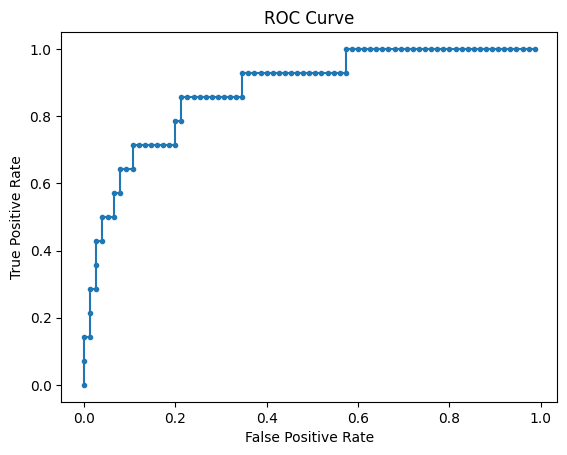

In [ ]:
## Your code to compute and plot ROC goes here
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1, probability=True)
clf.fit(X_train, y_train)

y_scores = clf.decision_function(X_test)

thresholds = np.sort(y_scores)
tpr = []
fpr = []

for threshold in thresholds:
    y_p = (y_scores > threshold).astype(int)
    TP = np.sum((y_p == 1) & (y_test == 1))
    FP = np.sum((y_p == 1) & (y_test == 0))
    FN = np.sum((y_p == 0) & (y_test == 1))
    TN = np.sum((y_p == 0) & (y_test == 0))
    tpr.append(TP / (TP + FN))
    fpr.append(FP / (FP + TN))

plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


**Task 4.3 (6 Points):** Compute the AUC of ROC

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1). AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example.

Compute the AUC of your SVM model. **Note that you are not allowed to use any library function to compute the AUC. You have to do it from scratch.**

In [ ]:
sorted_points = sorted(zip(fpr, tpr))
fpr_sorted, tpr_sorted = zip(*sorted_points)

auc = 0.0
for i in range(1, len(fpr_sorted)):
    h = fpr_sorted[i] - fpr_sorted[i - 1]
    b1 = tpr_sorted[i - 1]
    b2 = tpr_sorted[i]
    auc += 0.5 * (b1 + b2) * h

print(f"AUC: {auc}")


AUC: 0.8647619047619047
